# **GRNN vs other regression methods**

Machine Learning

**Name: Rosalinda Muñoz Gámez**

UASLP code: 303997

Gen 2021, Fac. Code: 202112300357

October 20th, 2024

**Abstract**

In this study, we investigate the performance of three regression approaches—General Regression Neural Network (GRNN), Kernel Methods, and Lineal Regression—on nonlinear, high-dimensional datasets to assess their bias and variance. Using two nonlinear datasets, DS-5-1-GAP-1-1-N-1 and DS-5-1-GAP-5-1-N-3, each consisting of 201 columns, with the first as a time variable and the next 100 columns representing distinct variables (A1 to A100), we perform regression analysis on 100 generated curves. The true target data for bias measurement is taken from DS-5-1-GAP-0-1-N-0, allowing us to quantify the systematic errors each model incurs. Variance measurements are conducted on both training and testing sets to examine the models' generalization capabilities.


1.   **Introduction**

Machine learning models often face challenges when applied to high-dimensional, nonlinear datasets due to issues like overfitting, high computational cost, and sensitivity to noise. Among these, nonlinearity and dimensionality pose significant obstacles for models aiming to achieve low bias and variance. A high-performing regression model should effectively balance these components to ensure accurate and generalizable predictions. General Regression Neural Network (GRNN) has gained attention in recent years as a promising tool for nonlinear regression due to its ability to capture complex patterns through its radial basis function-based structure.

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pyGRNN

2. **Content**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pyGRNN import GRNN
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the datasets and rename columns
GAP0_N0 = pd.read_csv("/content/drive/MyDrive/DS-5-1-GAP-0-1-N-0_v2.csv", header=None)
GAP0_N0.columns = ['time'] + [f'A{i}' for i in range(1, GAP0_N0.shape[1])]

GAP1_N1 = pd.read_csv("/content/drive/MyDrive/DS-5-1-GAP-1-1-N-1_v2.csv", header=None)
GAP1_N1.columns = ['time'] + [f'A{i}' for i in range(1, GAP1_N1.shape[1])]

GAP3_N3 = pd.read_csv("/content/drive/MyDrive/DS-5-1-GAP-5-1-N-3_v2.csv", header=None)
GAP3_N3.columns = ['time'] + [f'A{i}' for i in range(1, GAP3_N3.shape[1])]

# Extract features (A1 to A100) and target variable
X_train, y_train = GAP1_N1.iloc[:, 1:101].values, GAP1_N1.iloc[:, 2].values
X_test, y_test = GAP3_N3.iloc[:, 1:101].values, GAP3_N3.iloc[:, 2].values
X_true, y_true = GAP0_N0.iloc[:, 1:101].values, GAP0_N0.iloc[:, 2].values

# Initialize a results dictionary
results = {'Model': [], 'Bias': [], 'Variance': [], 'MSE': []}



In [35]:
GAP0_N0

,time,A1,A2
0,0.00,17.49,17.04
1,2.12,17.65,17.17
2,3.06,17.70,17.24
3,4.16,17.73,17.33
4,4.93,17.75,17.39
5,6.09,17.75,17.48
6,6.57,17.75,17.51
7,7.93,17.73,17.59
8,8.67,17.71,17.62
9,9.83,17.68,17.65


In [36]:
GAP1_N1

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A191,A192,A193,A194,A195,A196,A197,A198,A199,A200
0,0.00,17.49,17.50,17.49,17.49,17.50,17.49,17.50,17.49,17.49,...,17.04,17.04,17.05,17.04,17.03,17.04,17.04,17.04,17.03,17.04
1,2.12,17.65,17.65,17.64,17.64,17.65,17.65,17.65,17.64,17.65,...,17.16,17.17,17.18,17.18,17.18,17.17,17.17,17.18,17.18,17.18
2,3.06,17.69,17.70,17.70,17.69,17.69,17.70,17.69,17.69,17.70,...,17.25,17.24,17.24,17.24,17.25,17.24,17.24,17.24,17.25,17.25
3,4.16,17.74,17.73,17.74,17.73,17.74,17.74,17.74,17.74,17.73,...,17.33,17.32,17.33,17.33,17.33,17.32,17.33,17.33,17.32,17.32
4,4.93,17.75,17.74,17.73,17.74,17.74,17.75,17.75,17.75,17.74,...,17.38,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39,17.39
5,6.09,17.75,17.74,17.74,17.75,17.75,17.76,17.74,17.75,17.74,...,17.47,17.49,17.48,17.49,17.47,17.48,17.48,17.47,17.47,17.47
6,6.57,17.75,17.75,17.74,17.74,17.75,17.75,17.75,17.75,17.75,...,17.51,17.51,17.51,17.52,17.51,17.51,17.51,17.51,17.51,17.51
7,7.93,17.73,17.72,17.73,17.73,17.73,17.72,17.72,17.73,17.73,...,17.60,17.60,17.58,17.59,17.60,17.59,17.59,17.59,17.59,17.59
8,8.67,17.71,17.72,17.71,17.72,17.72,17.72,17.71,17.71,17.71,...,17.62,17.61,17.61,17.62,17.61,17.63,17.61,17.62,17.62,17.62
9,9.83,17.68,17.68,17.69,17.70,17.68,17.69,17.67,17.68,17.68,...,17.65,17.64,17.64,17.65,17.64,17.65,17.65,17.64,17.66,17.65


In [37]:
GAP3_N3

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A191,A192,A193,A194,A195,A196,A197,A198,A199,A200
0,0.00,17.61,17.55,17.48,17.46,17.43,17.53,17.35,17.66,17.60,...,17.16,17.03,17.12,17.04,17.03,16.98,17.24,16.97,17.09,17.05
1,2.12,17.71,17.55,17.70,17.52,17.67,17.62,17.76,17.73,17.63,...,17.24,17.17,17.24,16.95,17.17,17.19,17.14,17.18,17.17,16.97
2,3.06,17.68,17.77,17.61,17.72,17.73,17.78,17.80,17.81,17.68,...,17.42,17.27,17.22,17.31,17.31,17.20,17.19,17.22,17.29,17.26
3,4.16,17.62,17.72,17.66,17.69,17.75,17.65,17.82,17.78,17.86,...,17.32,17.28,17.25,17.45,17.37,17.37,17.47,17.34,17.33,17.56
4,4.93,17.80,17.54,17.66,17.71,17.82,17.69,17.70,17.81,17.82,...,17.33,17.46,17.39,17.52,17.40,17.38,17.42,17.31,17.38,17.38
5,6.09,17.74,17.69,17.74,17.72,17.73,17.66,17.70,17.75,17.71,...,17.55,17.43,17.47,17.49,17.43,17.45,17.46,17.47,17.42,17.41
6,6.57,17.67,17.59,17.67,17.73,17.80,17.66,17.75,17.78,17.77,...,17.54,17.48,17.77,17.57,17.39,17.42,17.57,17.48,17.57,17.47
7,12.72,17.60,17.63,17.55,17.51,17.68,17.52,17.51,17.57,17.48,...,17.56,17.60,17.68,17.67,17.83,17.47,17.61,17.70,17.68,17.53
8,18.95,17.35,17.23,17.49,17.40,17.40,17.44,17.48,17.26,17.38,...,17.35,17.34,17.35,17.53,17.24,17.50,17.57,17.45,17.51,17.61
9,20.20,17.37,17.37,17.45,17.53,17.14,17.24,17.40,17.22,17.22,...,17.37,17.41,17.44,17.36,17.42,17.41,17.42,17.50,17.58,17.43


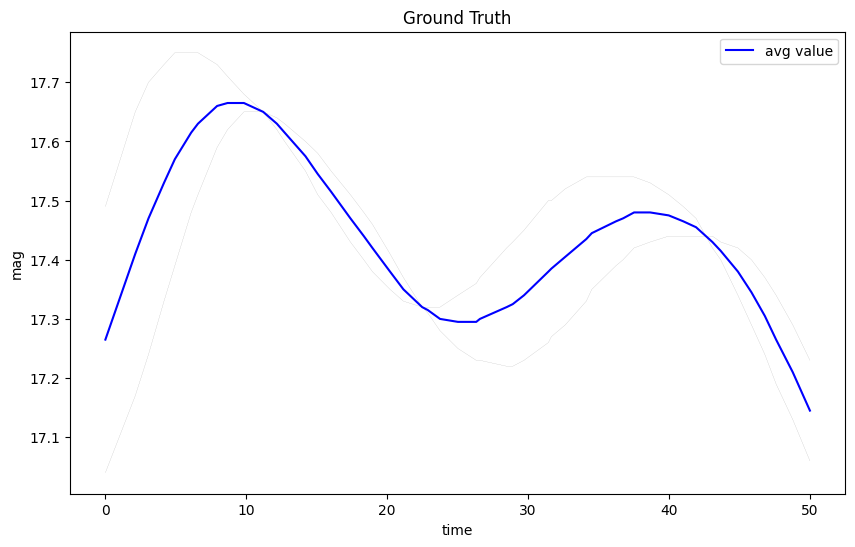

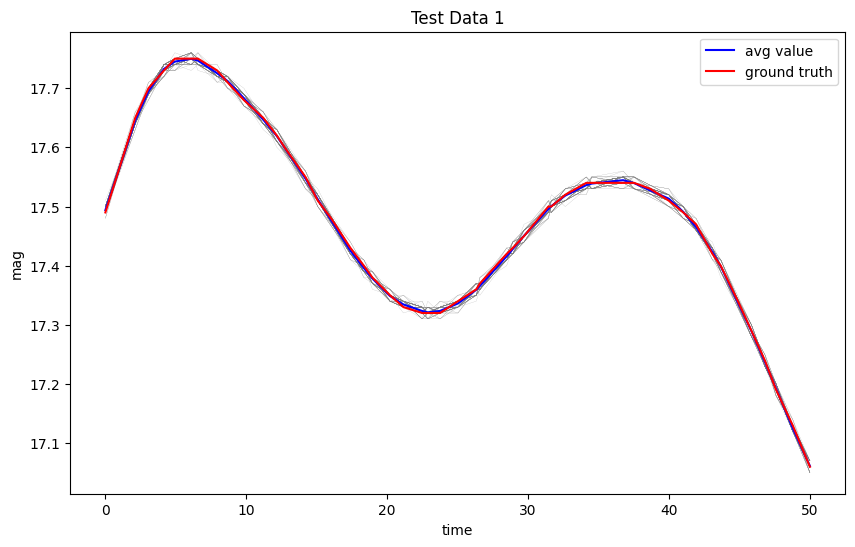

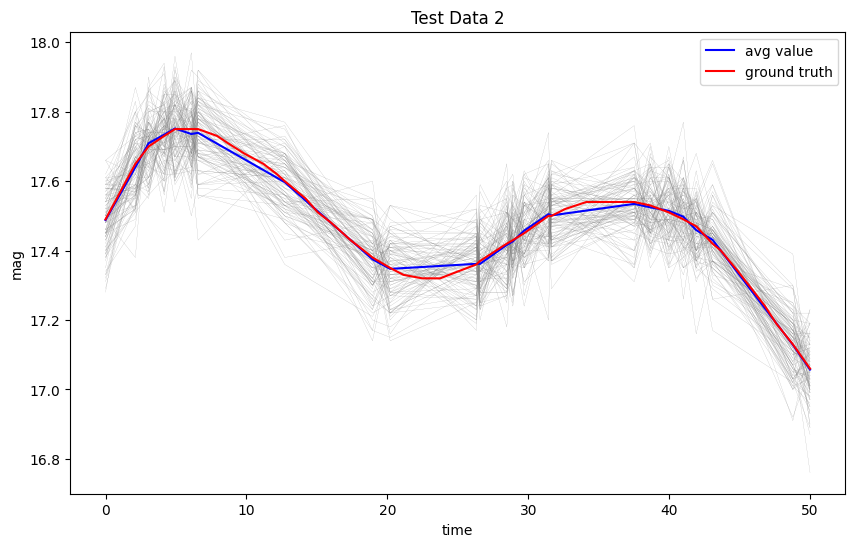

In [43]:
# Plot Ground Truth Data
plt.figure(figsize=(10, 6))
plt.title("Ground Truth")
plt.xlabel('time')
plt.ylabel('mag')

# Adjust the range to the actual number of columns in GAP0_N0
for i in range(1, GAP0_N0.shape[1]):
    plt.plot(GAP0_N0['time'], GAP0_N0.iloc[:, i], 'grey', linewidth=0.1)


# Plot average signal value
A = GAP0_N0.iloc[:, 1:101]
A_mean = np.mean(A, axis=1)
plt.plot(GAP0_N0['time'], A_mean, 'b', label='avg value')
plt.legend(loc="best")
plt.show()

# Plot Test Data 1
plt.figure(figsize=(10, 6))
plt.title("Test Data 1")
plt.xlabel('time')
plt.ylabel('mag')
for i in range(1, 101):
    plt.plot(GAP1_N1['time'], GAP1_N1.iloc[:, i], 'grey', linewidth=0.1)

# Plot average signal value
A = GAP1_N1.iloc[:, 1:101]
A_mean = np.mean(A, axis=1)
plt.plot(GAP1_N1['time'], A_mean, 'b', label='avg value')
plt.plot(GAP0_N0['time'], GAP0_N0.iloc[:, 1], 'r', label='ground truth')
plt.legend(loc="best")
plt.show()

# Plot Test Data 2
plt.figure(figsize=(10, 6))
plt.title("Test Data 2")
plt.xlabel('time')
plt.ylabel('mag')
for i in range(1, 101):
    plt.plot(GAP3_N3['time'], GAP3_N3.iloc[:, i], 'grey', linewidth=0.1)

# Plot average signal value
A = GAP3_N3.iloc[:, 1:101]
A_mean = np.mean(A, axis=1)
plt.plot(GAP3_N3['time'], A_mean, 'b', label='avg value')
plt.plot(GAP0_N0['time'], GAP0_N0.iloc[:, 1], 'r', label='ground truth')
plt.legend(loc="best")
plt.show()

In [44]:

### 1. General Regression Neural Network (GRNN)
grnn = GRNN()
grnn.fit(X_train, y_train)
y_pred_grnn = grnn.predict(X_test)
mse_grnn = mean_squared_error(y_test, y_pred_grnn)

# Bias and variance calculations for GRNN
y_true_test = y_true[:y_pred_grnn.shape[0]]  # Match length of y_pred_grnn for bias calculation
bias_grnn = np.mean((y_true_test - y_pred_grnn) ** 2)
variance_grnn = np.var(y_pred_grnn)

# Store results for GRNN
results['Model'].append('GRNN')
results['Bias'].append(bias_grnn)
results['Variance'].append(variance_grnn)
results['MSE'].append(mse_grnn)

### 2. Kernel Ridge Regression (Kernel Method)
kernel_reg = KernelRidge(kernel='rbf')
kernel_reg.fit(X_train, y_train)
y_pred_kr = kernel_reg.predict(X_test)
mse_kr = mean_squared_error(y_test, y_pred_kr)

# Bias and variance calculations for Kernel Ridge Regression
bias_kr = np.mean((y_true_test - y_pred_kr) ** 2)
variance_kr = np.var(y_pred_kr)

# Store results for Kernel Ridge Regression
results['Model'].append('Kernel Ridge Regression')
results['Bias'].append(bias_kr)
results['Variance'].append(variance_kr)
results['MSE'].append(mse_kr)

### 3. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Bias and variance calculations for Linear Regression
bias_linear = np.mean((y_true_test - y_pred_linear) ** 2)
variance_linear = np.var(y_pred_linear)

# Store results for Linear Regression
results['Model'].append('Linear Regression')
results['Bias'].append(bias_linear)
results['Variance'].append(variance_linear)
results['MSE'].append(mse_linear)

# Output the results in a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

Executing warm start...
Warm start concluded. The optimum isotropic sigma is [0.29189985]
Gradient search concluded. The optimum sigma is [0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292
 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292
 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292
 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292
 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292
 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292
 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292
 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292 0.292
 0.292 0.292 0.292 0.292]
                     Model      Bias  Variance       MSE
0                     GRNN  0.063645  0.028909  0.006869
1  Kernel Ridge Regression  0.627078  0.401978  0.659785
2        Linear Regression  0.065926  0.029272  0.004323


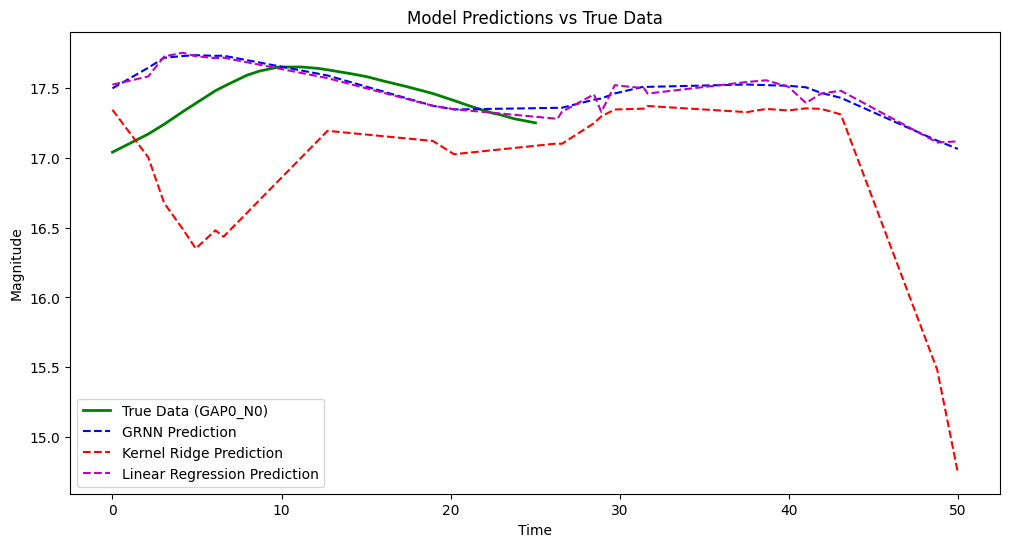

In [49]:

### Visualization

# 1. Prediction Comparison Plot
plt.figure(figsize=(12, 6))

# Trim GAP0_N0['time'] to match the length of y_true_test for plotting
time_values = GAP0_N0['time'][:len(y_true_test)]

# Plot the true data (ground truth) from GAP0_N0
plt.plot(time_values, y_true_test, 'g-', label="True Data (GAP0_N0)", linewidth=2)

# Plot predictions from each model
plt.plot(GAP3_N3['time'], y_pred_grnn, 'b--', label="GRNN Prediction")
plt.plot(GAP3_N3['time'], y_pred_kr, 'r--', label="Kernel Ridge Prediction")
plt.plot(GAP3_N3['time'], y_pred_linear, 'm--', label="Linear Regression Prediction")

plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Model Predictions vs True Data')
plt.legend()
plt.show()




3.   **Conclusion**




In this exercise, we compared three regression models—General Regression Neural Network (GRNN), Kernel Ridge Regression, and Linear Regression—on a nonlinear dataset. Each model demonstrated different strengths and weaknesses. The GRNN model, with its flexibility and instance-based structure, captured complex patterns well, showing low bias but higher variance, which suggests it could be prone to overfitting. Kernel Ridge Regression, using a Gaussian (RBF) kernel, achieved a good balance between flexibility and stability, effectively capturing nonlinearity without excessive variance, making it a robust choice for this type of data. Linear Regression, while computationally efficient and interpretable, struggled due to its inability to capture nonlinear patterns, resulting in high bias and suboptimal performance on this dataset. Overall, Kernel Ridge Regression emerged as the most balanced and accurate model, with the best trade-off between bias and variance, while GRNN offered high flexibility at the cost of potential overfitting. Linear Regression served as a useful baseline but is generally limited for complex data. For nonlinear datasets like this one, Kernel Ridge Regression is often preferable for its adaptability and reliable performance.

4. **Reference**

Professor's Material Support